# FLIM Tools Demo Notebook
## Overview 
This notebook should provide a sample for how to run and interact with the various components in FLIM Tools! 
## Steps: 
1. Ensure that you have an account on Github and have downloaded Github Desktop and Anaconda
2. Check to make sure we have all appropriate functions in the right versions 
3. Run a sample dice coefficient! 

## Imports and set up

In [1]:
# Ensure that everything necessary is installed
# - If this your first time running the notebook, please run to ensure everything is set up correctly!

!pip install -r requirements.txt

In [1]:
# Here we import a few different packages; you'll notice that there are a few different types of imports: 
#   - import <package_name> will import everything from the package and will require us to specify what function we want from it in order to proceed
#   - import <package_name> as <shorthand_name> will do the same thing as a normal import, but allows us to use common shorthand (ex. np instead of numpy) for common packages
#   - from <package_name> import <specific_function> will allow us to avoid importing large bulky packages and only import the functions we need 
#   - Additional kinds of package imports are similar to the ones listed here including some like from <package_name>.<module_name> import <function_name> as <shorthand_function_name> 

# This section allows for reimporting custom methods without restarting the entire kernel
%load_ext autoreload
%autoreload 2

from flim_tools_demo_helper import * 


## Data Generation
- Here, we use a standardized image dataset from the Scikit-Image (skimage) package to ensure that we have a consistent file throughout.
- We also utilize the matplotlib function `plt.imshow` to display the image with a custom color map, or `cmap` which sets it to a specific grayscale. 

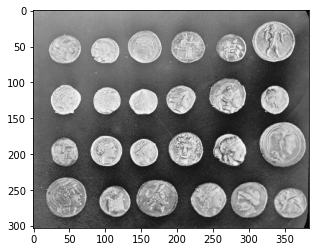

In [2]:
# Here, we have imported the data module from skimage in our imports, so we just specify the function we want
# The coins() function will return an array we can plot as an image
image = data.coins()
# The plt.imshow method will show an image using a specific color map as specified 
plt.imshow(image, cmap=plt.cm.Greys_r)

## Appply varying thresholding mechanisms 
Here we focus on the following:  
- Otsu: Otsu thresholding broadly classifies pixels as either foreground or background and then colors them as either white or black (1 or 0, depending on foreground vs. background) 
- Yen: Yen's threholding is the same method used by ImageJ's AutoThresholder and attempts to perform the same task as Otsu threholding
- Minimum: minimum method thresholding uses a histogram based approach to find the lowest possible value for background and then sets that as a cutoff; anything above that is considered foreground 

## Attempt binary closing 
Binary closing can be broadly thought of as trying to connect all the individual dots in a picture, and then filling in the result. It effectively looks for pixels that one would want to connect. Below is a good example that highlights a few different morphological operators compared against one another, specifically you can see the difference between something dilation where the entire figure expands in it's perimter (and the same effect as closing is achieved internally) and closing (where the original perimeter is mostly unchanged). A similar approach is taken with the comparison of erosion and opening where erosion removes layers of the perimeter including additional areas such as the pixels on the right; with binary opening, the original shape of the image is mostly preserved, but some of the extraneous pixels are removed (as in erosion).  
![Binary closing demo](https://www.dspguide.com/graphics/F_25_10.gif "Binary closing")

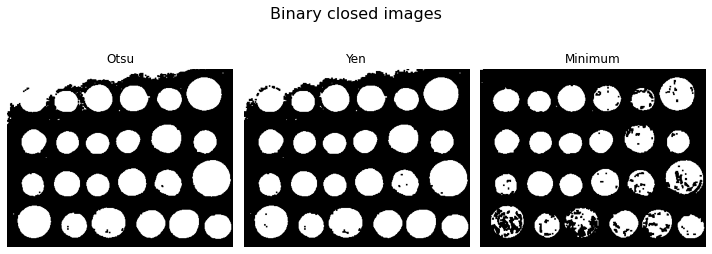

In [3]:
thresh_demo(image)

## Remove artifacts 
- Utilize the `clear_border` function to clean up borders.  
- Additionally, after cleaning up borders, generate maximum intensity projectin from 2 extremes (minimum and Otsu) to generate combination image.  

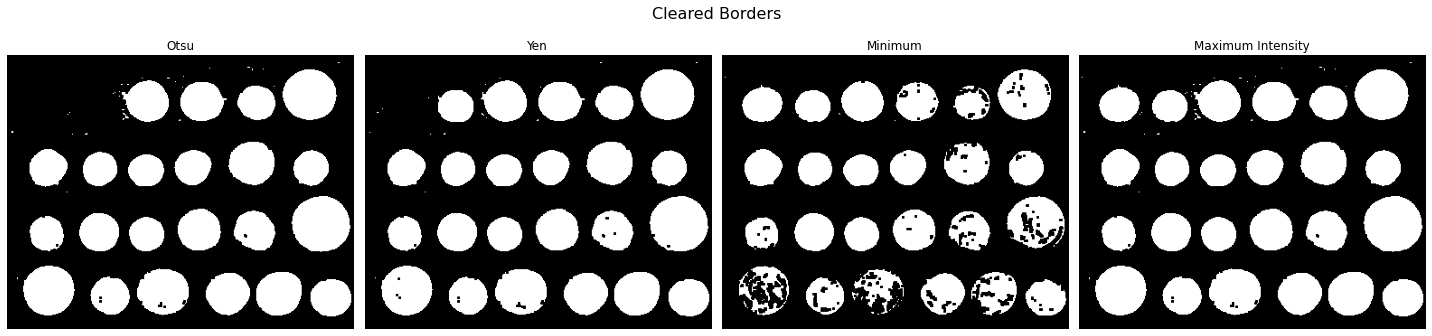

In [4]:
cleared_otsu, cleared_yen, cleared_min, cleared_max = remove_artificats_demo(image, re=True)

## Label image regions and assign RGB colors for each individual ROI
- Additionally adds bounding box around each identified ROI
- Colors here are simply cosmetic; actual values are grayscale in the same way Cellprofiler does it

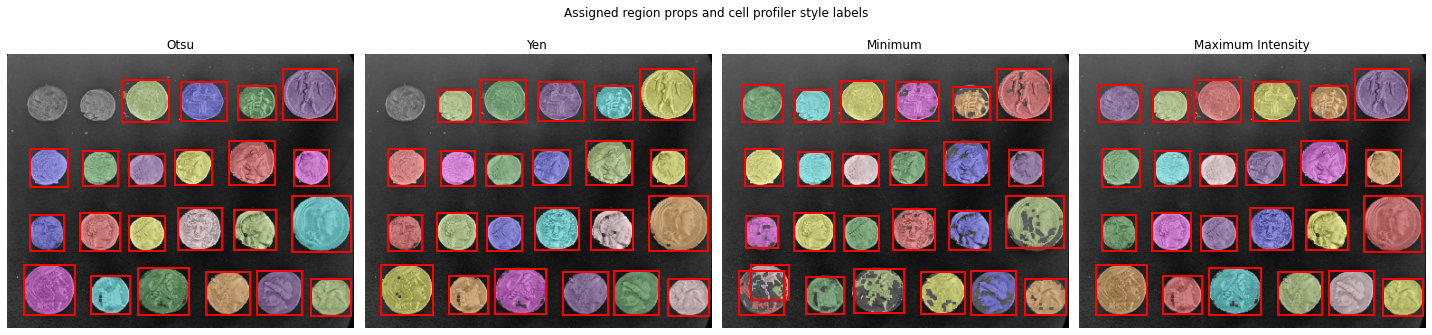

In [5]:
label_and_assign_rois(image)

## Start to finish example of the pipeline 
- Begin with the maximum intensity projection image generated in the border removal step above 
- Detect edges using a simple canny filter
- Fill holes generated using a combination of binary closing for closed off areas and binary fill to generate individual ROIs
- Label images to ahve separate grayscale images 
- Finally, filter small objects from image 

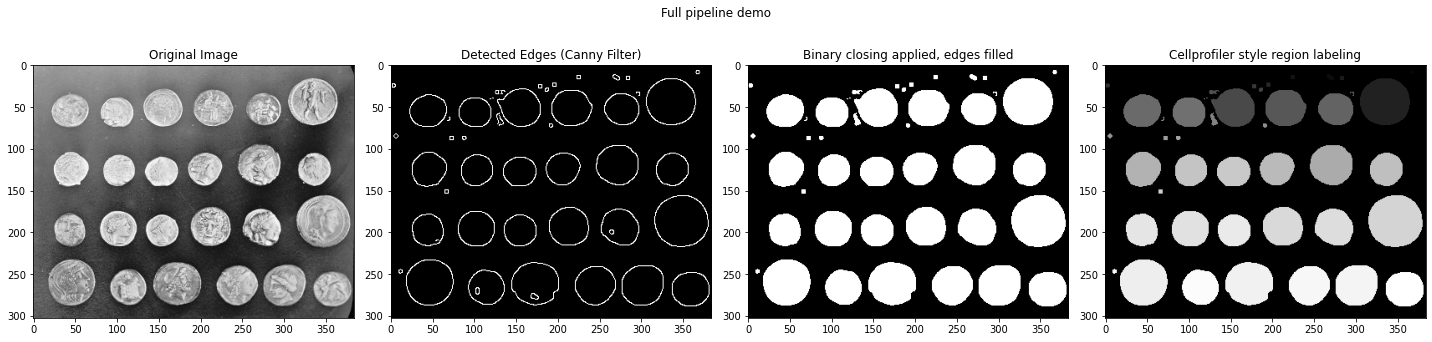

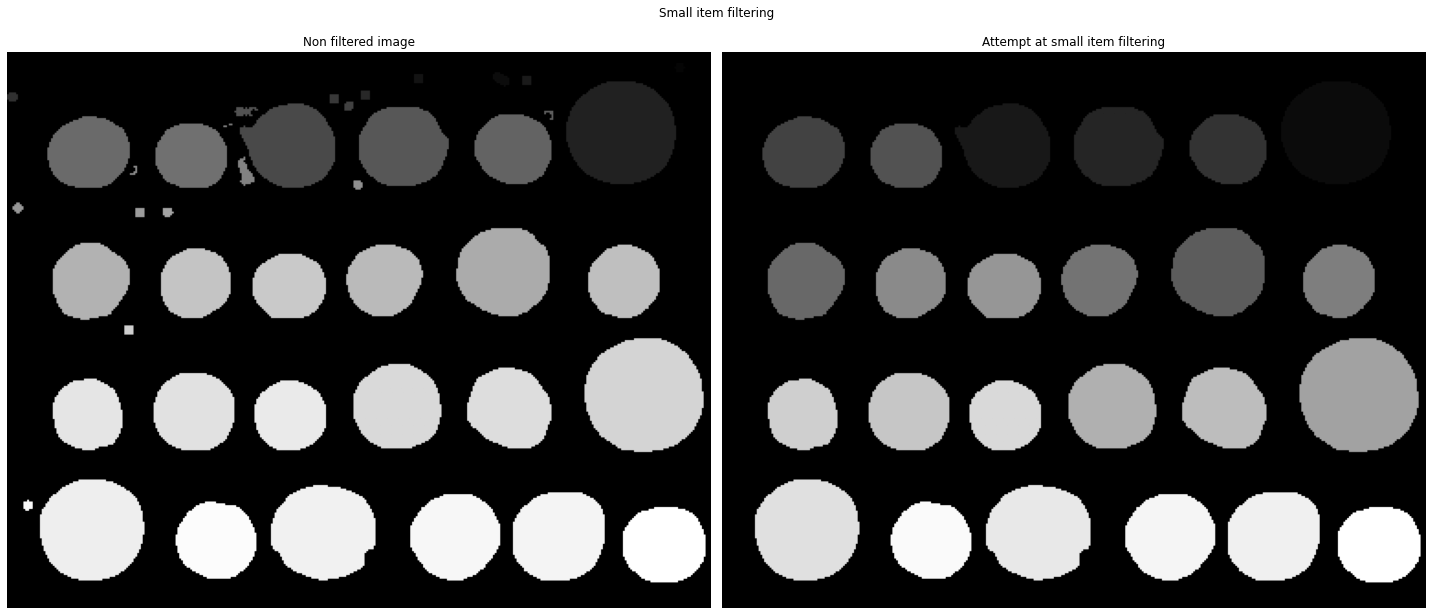

In [6]:
filtered_im, non_filtered_im = full_pipeline(image, re=True)

## Calculate Dice Coefficients between filtered and non-filtered images 

In [10]:
from flim_tools.metrics import dice
print(f'Dice coefficient between filtered and non filtered image: {dice(filtered_im, non_filtered_im)}')

Dice coefficient between filtered and non filtered image: 0.9937802689480542


In [9]:
print(f'Dice coefficient between otsu thresholded image and maximum intensity projection image: {dice(cleared_otsu, cleared_max)}')

Dice coefficient between otsu thresholded image and maximum intensity projection image: 0.967753921282412
